## IMPORT DATA FOR MACHINE LEARNING

In [124]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

from pathlib import Path

In [125]:
#import train data
train_df = pd.read_csv(
    Path('../data/train.csv')
    )

In [126]:
#review trained data
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [127]:
#show summary statistics on train dataset
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [128]:
#check missing data on train dataset
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [129]:
#import test data
test_df = pd.read_csv(
    Path('../data/test.csv')
    )

In [130]:
#reivew test data
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [131]:
#show summary statistics on test dataset
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [132]:
#check missing data on test dataset
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## PREPROCESS DATA

In [133]:
#set loan status dataframe for y 
loan_status = train_df.Loan_Status

In [134]:
#we can now drop loan status from train dataframe
train_df.drop('Loan_Status', axis=1, inplace=True) 

In [135]:
#set loan ID dataframe
Loan_ID_df = test_df.Loan_ID

In [136]:
#append test and train dataframe
loan_data_df = train_df.append(test_df)

In [137]:
#preview new train and test appended dataframe
loan_data_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [138]:
#confrim appended dataframe size
loan_data_df.shape

(981, 12)

In [139]:
#show summary statistics on new dataframe
loan_data_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [140]:
#check for null value
loan_data_df.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

<AxesSubplot:>

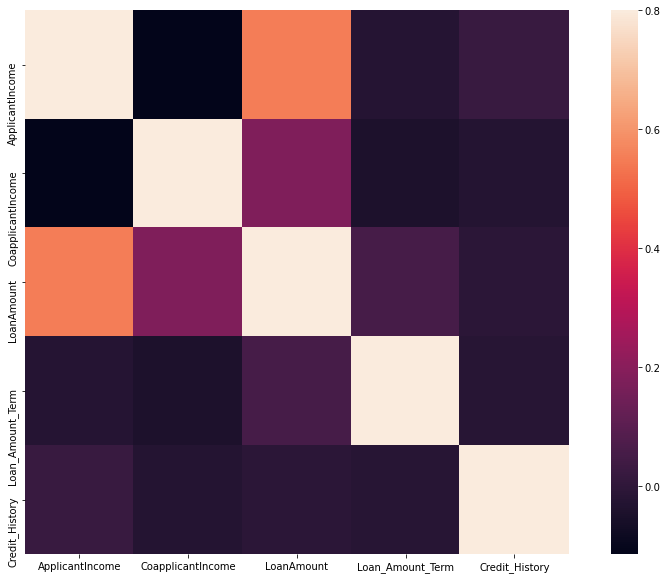

In [141]:
#show correlation on heatmap
%matplotlib inline
corrmat=loan_data_df.corr()
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corrmat, vmax=.8, square=True)

In [142]:
#loan amount and applicant income are highly correlated which is to be expected
#nothing too surprising here dependents and married have higher correlation

In [143]:
loan_data_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [144]:
#count how many married vs single
loan_data_df.Married.value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [145]:
#count Gender
loan_data_df.Gender.value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [146]:
#count how many males vs females
loan_data_df.Dependents.value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [147]:
loan_data_df.Education.value_counts()

Graduate        763
Not Graduate    218
Name: Education, dtype: int64

In [148]:
loan_data_df.Self_Employed.value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [149]:
loan_data_df.ApplicantIncome.describe()

count      981.000000
mean      5179.795107
std       5695.104533
min          0.000000
25%       2875.000000
50%       3800.000000
75%       5516.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [150]:
loan_data_df.LoanAmount.describe()

count    954.000000
mean     142.511530
std       77.421743
min        9.000000
25%      100.000000
50%      126.000000
75%      162.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [151]:
loan_data_df.Credit_History.value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [152]:
loan_data_df.Property_Area.value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [153]:
#label encode all categories in a function

def encode1(Loan_Status):
        if Loan_Status == 'Y':
            return 1
        else:
            return 0

def encode2(Gender):
        if Gender == 'Male':
            return 1
        else:
            return 0   

def encode3(Married):
        if Married == 'Yes':
            return 1
        else:
            return 0  

def encode4(Education):
        if Education == 'Graduate':
            return 1
        else:
            return 0  

def encode5(Self_Employed):
        if Self_Employed == 'Yes':
            return 1
        else:
            return 0  

def encode6(Property_Area):
        if Property_Area == 'Urban':
            return 1
        elif Property_Area == 'Rural':
            return 0
        else:
            return 2

def encode7(Dependents):
        if Dependents == '0':
            return 0
        elif Dependents == '1':
            return 1
        elif Dependents == '2':
            return 2    
        else:
            return 3

In [154]:
#show dataframe before encoding
loan_data_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [155]:
loan_data_df['Gender'] = loan_data_df["Gender"].apply(encode2)
loan_data_df['Married'] = loan_data_df["Married"].apply(encode3)
loan_data_df['Education'] = loan_data_df["Education"].apply(encode4)
loan_data_df['Self_Employed'] = loan_data_df["Self_Employed"].apply(encode5)
loan_data_df['Property_Area'] = loan_data_df["Property_Area"].apply(encode6)
loan_data_df['Dependents'] = loan_data_df["Dependents"].apply(encode7)

In [156]:
#review datafram after encoding
loan_data_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1,0,0,1,0,5849,0.0,NaN,360.0,1.0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1


In [157]:
#review datafram after encoding
loan_data_df.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,1,1,3,0,1,4009,1777.0,113.0,360.0,1.0,1
363,LP002975,1,1,0,1,0,4158,709.0,115.0,360.0,1.0,1
364,LP002980,1,0,0,1,0,3250,1993.0,126.0,360.0,NaN,2
365,LP002986,1,1,0,1,0,5000,2393.0,158.0,360.0,1.0,0
366,LP002989,1,0,0,1,1,9200,0.0,98.0,180.0,1.0,0
